In [1]:
import sys
import pandas
import matplotlib.pyplot as plt
MPLSTYLE = '/arc/home/shiona/paper_sty.mplstyle'
plt.style.use(MPLSTYLE)

journal_textwidths = {'prd': 6.50127,
                      'none': 8.5,
                      'kaobook':6.5, # just a guess
                      'apj':6.0,
                      'aj': 6.0
                      } # Latex's \textwidth in inches

def figsize(fraction_of_textwidth = 0.45,height_per_width  = 1 / 1.61803399,journal = 'prd'):
    """When making your figure, decide its aspect ratio and your journal and its width as a fraction of the \textwidth of the journal. Then use matplotlib.pyplot.Figure(figsize = ...) to specify the right size"""
    textwidth = journal_textwidths[journal]
    width_in = textwidth * fraction_of_textwidth
    height_in = height_per_width * width_in
    return (width_in, height_in)

plt.rcParams["figure.figsize"] = figsize( 2 / 1.61803399,journal = 'apj')

import matplotlib.gridspec as gridspec


In [202]:
import numpy as np
tel2='gbo'
tag=f'M22_true_pos_fit_{tel2}_KL_filter'

f=f'/arc/home/shiona/OVP_astrometry/notebooks/plotting_data/hco_comissioning2_{tag}_all_{tel2}_calibrator_calibrated.csv'
df=pandas.read_csv(f)
df=df[df['name']!='EXT']
df=df[df['calibrator_name']!='EXT']
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)
dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>13) & (dfx['cal_incoh_snr_xx'][i]>10):
        keep.append("X")
    elif (dfx['snr_yy'][i]>13) & (dfx['cal_incoh_snr_yy'][i]>10):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)
len(dfc)

101

(-10.0, 10.0)

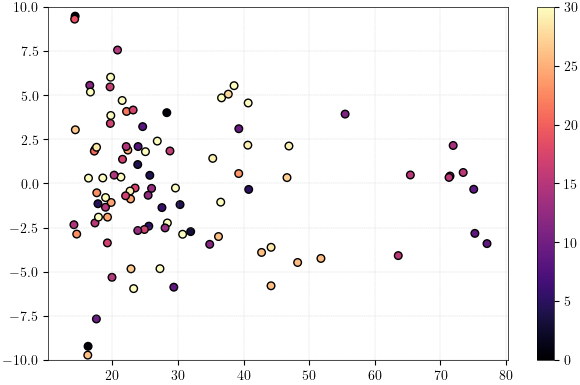

In [203]:
ax=plt.gca()
vmax=30
im=ax.scatter(dfc['snr_xx'],dfc['tau_xx']*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
plt.colorbar(im)
ax.set_ylim(-10,10)


In [190]:
df_int=dfc[dfc['snr_xx']>50]
df_int=df_int[df_int['tau_xx_ns']<-2]
#df_int['filename'][160]
df_int

,incoh_snr_xx,incoh_snr_yy,ctime,event_id,calibrator_name,calibrator_ra,calibrator_dec,ra,name,dec,...,y_cal,x_tar,y_tar,delta_x,delta_y,pulsar_good_pos,tau_xx_ns,tau_yy_ns,best_pol,keep
24,36.092133,31.232788,1.738702e+09,436394618,J2150+1449,327.598364,14.829971,329.257842,B2154+40,40.296134,...,-34.371773,-1.071132,-8.892399,-1.249718,25.479374,True,-3.66,-4.58,X,True


In [194]:
df_int['filename'][24]

'/arc/projects/chime_frb/vlbi/OVP_astrometry_hco/M22_true_pos_fit_hco_KL_filter/436394618/calibrated/B2154+40_calibrated_to_J2150+1449_vis.h5'

3.156670516540572


Text(0.5, 1.0, '101 gbo test localizations')

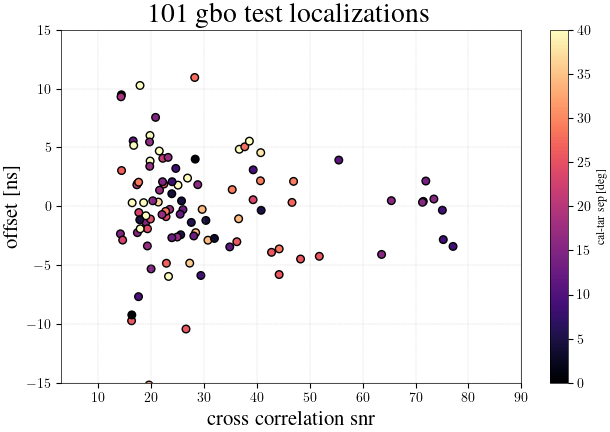

In [145]:
def calculate_rms(data):
  """
  Calculates the root mean square (RMS) of a list or array of numbers.

  Args:
    data: A list or numpy array of numerical values.

  Returns:
    The RMS value of the data.
  """

  squared_values = np.array(data) ** 2
  mean_of_squares = np.mean(squared_values)
  rms = np.sqrt(mean_of_squares)
  return rms

cmap='magma'
c='delta_y'
c='delta_y'
vmin=0
vmax=40
fontsize=15
ax=plt.gca()
im=ax.scatter(dfc['snr_xx'],dfc['tau_xx']*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
dfx=dfc[dfc['snr_xx']>30]
rms=calculate_rms(np.array(dfx['tau_xx'][:]*1e3))
print(rms)
cbar=plt.colorbar(im)
ax.set_ylabel('offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
ax.set_ylim(-15,15)
ax.set_xlim(3,90)
cbar.set_label('cal-tar sep [deg]')

ax.set_title(f"{len(dfc)} {tel2} test localizations")


In [146]:
if tel2=='hco':
    df_og=pandas.read_csv(f'plotting_data/hco_comissioning2_M22_true_pos_fit_hco_MASK_RFI_all_hco_calibrator_calibrated.csv')
else:
    df_og=pandas.read_csv(f'plotting_data/hco_comissioning2_M5_fit_all_{tel2}_calibrator_neutral.csv')
df_og=dfc[['event_id','name','tau_xx_ns','incoh_snr_xx','snr_xx','filename']].merge(df_og,on=['event_id','name'])
len(df_og)

61

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  4.,  6.,  9.,
         6., 13.,  5.,  6.,  3.,  3.,  1.,  0.,  3.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.]),
 array([-20.        , -18.62068966, -17.24137931, -15.86206897,
        -14.48275862, -13.10344828, -11.72413793, -10.34482759,
         -8.96551724,  -7.5862069 ,  -6.20689655,  -4.82758621,
         -3.44827586,  -2.06896552,  -0.68965517,   0.68965517,
          2.06896552,   3.44827586,   4.82758621,   6.20689655,
          7.5862069 ,   8.96551724,  10.34482759,  11.72413793,
         13.10344828,  14.48275862,  15.86206897,  17.24137931,
         18.62068966,  20.        ]),
 <BarContainer object of 29 artists>)

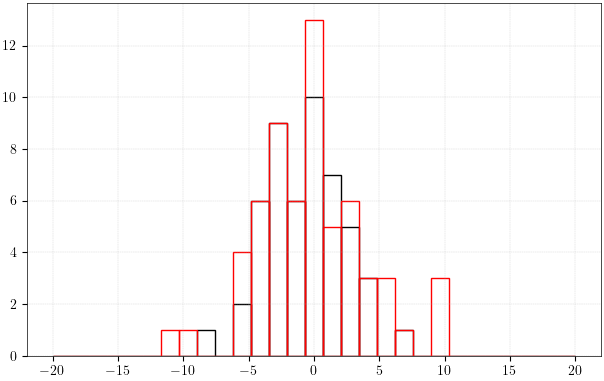

In [147]:
bins=np.linspace(-20,20,30)
plt.hist((df_og['tau_xx_ns_y']),facecolor="None",edgecolor='black',bins=bins)
plt.hist((df_og['tau_xx_ns_x']),facecolor="None",edgecolor='red',bins=bins,)

In [156]:
df_og['tau_improvement']=df_og['tau_xx_ns_x']-df_og['tau_xx_ns_y']
df_og['snr_improvement']=df_og['snr_xx_x']-df_og['snr_xx_y']
df_og=df_og.sort_values(by='tau_improvement',ascending=False).reset_index(drop=True)
f=df_og['filename_x'][0]#['filename']
print(f)
f=df_og['filename_y'][0]#['filename']
print(f)


/arc/projects/chime_frb/vlbi/OVP_astrometry_gbo/M22_true_pos_fit_gbo_KL_filter/438100044/calibrated/J035902.6+600522_calibrated_to_J0410+7656_vis.h5
/arc/projects/chime_frb/vlbi/OVP_astrometry_gbo/M22_true_pos_fit_gbo/438100044/calibrated/J035902.6+600522_calibrated_to_J0410+7656_vis.h5


Text(0.5, 1.0, '101 gbo test localizations')

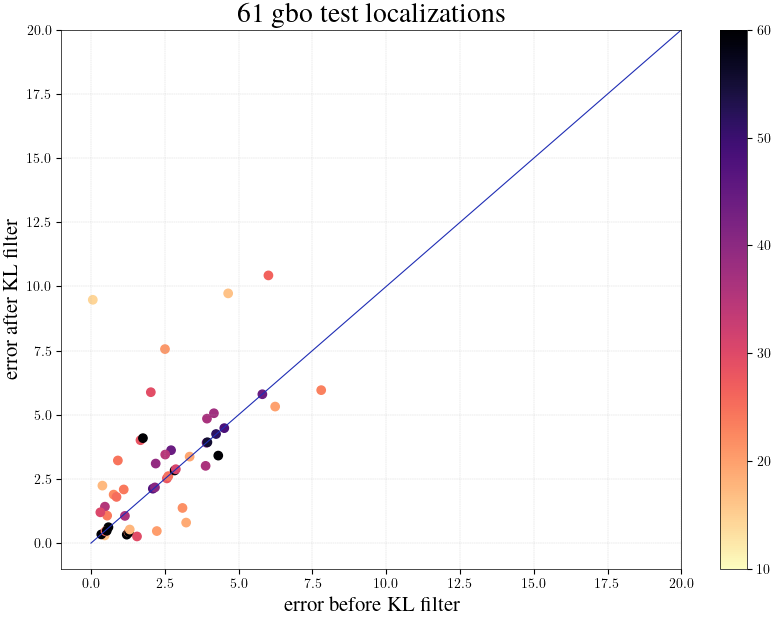

In [149]:
plt.figure(figsize=(10,7))
plt.plot([0,20],[0,20])
plt.xlim(-1,20)
plt.ylim(-1,20)
im=plt.scatter(np.abs(df_og['tau_xx_ns_y']),np.abs(df_og['tau_xx_ns_x']),c=df_og['snr_xx_x'],vmin=10,vmax=60,cmap='magma_r')
plt.colorbar(im)
plt.title(f"{len(df_og)} {tel2} test localizations")

plt.ylabel('error after KL filter',fontsize=fontsize)
plt.xlabel('error before KL filter',fontsize=fontsize)
ax.set_title(f"{len(dfc)} {tel2} test localizations")


Text(0.5, 1.0, '39 gbo test localizations')

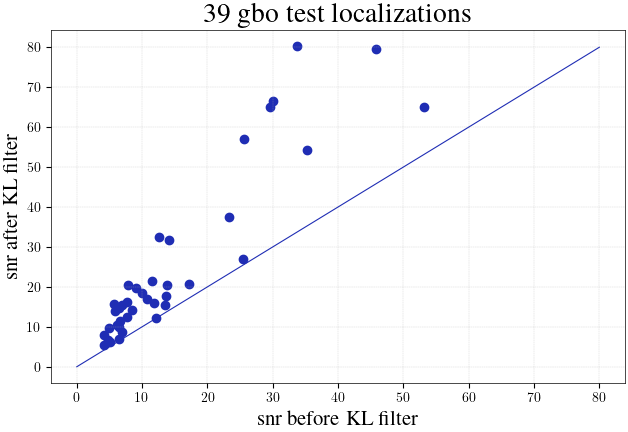

In [153]:
df_og['snr_improvement']=df_og['incoh_snr_xx_x']-df_og['incoh_snr_xx_y']

#df_og=df_og[df_og['snr_improvement']>0]
#df_og=df_og[df_og['snr_improvement']>0]
ax=plt.gca()
plt.plot([0,80],[0,80])
plt.scatter(df_og['incoh_snr_xx_y'],df_og['incoh_snr_xx_x'])
plt.ylabel('snr after KL filter',fontsize=fontsize)
plt.xlabel('snr before KL filter',fontsize=fontsize)
ax.set_title(f"{len(df_og)} {tel2} test localizations")


3.0983422987116778


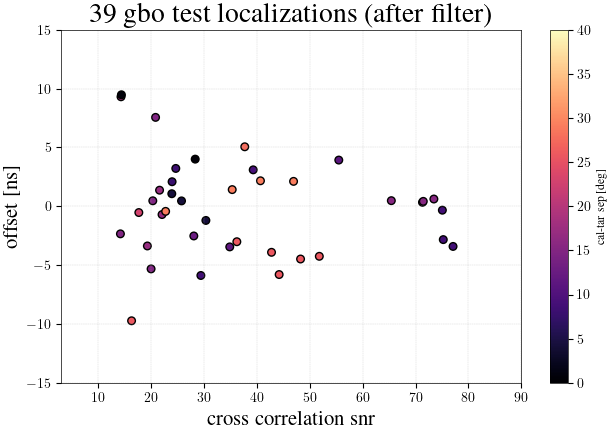

2.9208910930736707


Text(0.5, 1.0, '39 gbo test localizations')

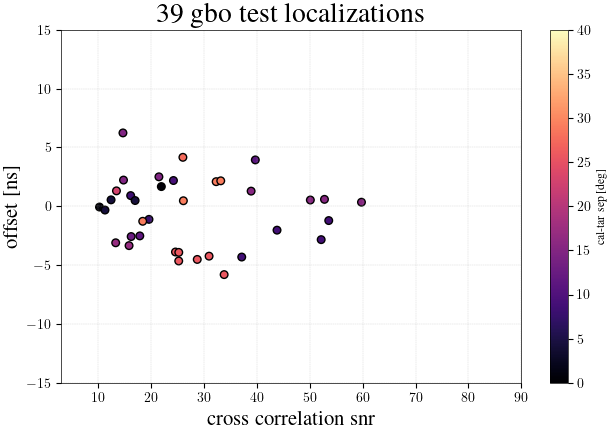

In [154]:
cmap='magma'
c='delta_y'
c='delta_y'
vmin=0
vmax=40
fontsize=15
df_og=df_og[np.abs(df_og['delta_y'])<30]
ax=plt.gca()
im=ax.scatter(df_og['snr_xx_x'],df_og['tau_xx_ns_x'],edgecolor='black',c=np.abs((df_og[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]

dfx=df_og[df_og['snr_xx_x']>30]
rms=calculate_rms(np.array(dfx['tau_xx_ns_x'][:]))
print(rms)
cbar=plt.colorbar(im)
ax.set_ylabel('offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
ax.set_ylim(-15,15)
ax.set_xlim(3,90)
cbar.set_label('cal-tar sep [deg]')

ax.set_title(f"{len(df_og)} {tel2} test localizations (after filter)")
plt.show()



ax=plt.gca()
im=ax.scatter(df_og['snr_xx_y'],df_og['tau_xx_ns_y'],edgecolor='black',c=np.abs((df_og[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]

dfx=df_og[df_og['snr_xx_y']>30]
rms=calculate_rms(np.array(dfx['tau_xx_ns_y'][:]))
print(rms)
cbar=plt.colorbar(im)
ax.set_ylabel('offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
ax.set_ylim(-15,15)
ax.set_xlim(3,90)
cbar.set_label('cal-tar sep [deg]')

ax.set_title(f"{len(df_og)} {tel2} test localizations")



2.9208910930736707


Text(0.5, 1.0, '101 gbo test localizations')

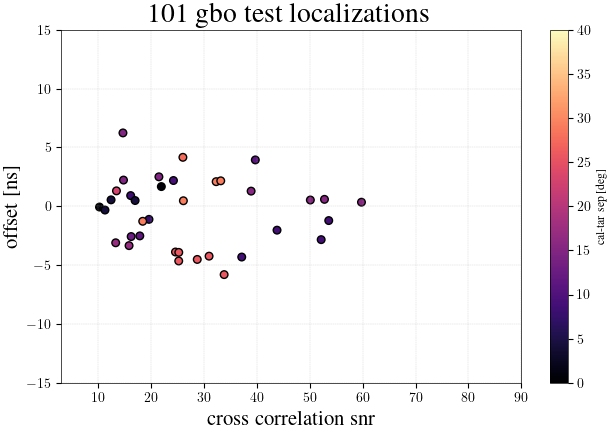

In [152]:
cmap='magma'
c='delta_y'
c='delta_y'
vmin=0
vmax=40
fontsize=15
ax=plt.gca()
im=ax.scatter(df_og['snr_xx_y'],df_og['tau_xx_ns_y'],edgecolor='black',c=np.abs((df_og[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
dfx=df_og[df_og['snr_xx_y']>30]
rms=calculate_rms(np.array(dfx['tau_xx_ns_y'][:]))
print(rms)
cbar=plt.colorbar(im)
ax.set_ylabel('offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
ax.set_ylim(-15,15)
ax.set_xlim(3,90)
cbar.set_label('cal-tar sep [deg]')

ax.set_title(f"{len(dfc)} {tel2} test localizations")
